In [5]:
import pandas as pd

# File Path
file_path = 'drw-crypto-market-prediction/train.parquet'

df= pd.read_parquet(file_path)
#df.head()

In [6]:
print(df.columns.tolist())

['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X13

In [7]:
# Data size
print("Shape:", df.shape)

# Data type
print(df.dtypes)


df.describe().T

Shape: (525887, 896)
bid_qty     float64
ask_qty     float64
buy_qty     float64
sell_qty    float64
volume      float64
             ...   
X887        float64
X888        float64
X889        float64
X890        float64
label       float64
Length: 896, dtype: object


C:\Users\siman_gand23m\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\siman_gand23m\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\siman_gand23m\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\siman_gand23m\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\siman_gand23m\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\siman_gand23m\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\U

,count,mean,std,min,25%,50%,75%,max
bid_qty,525887.0,9.968003,15.645741,0.001000,2.634000,6.415000,13.085000,1114.932000
ask_qty,525887.0,10.174169,15.889582,0.001000,2.678000,6.538000,13.330000,1352.965000
buy_qty,525887.0,131.726678,307.267251,0.000000,26.407000,57.015000,127.639000,17614.400000
sell_qty,525887.0,132.673944,309.803040,0.000000,27.021000,58.047000,129.110000,17686.234000
volume,525887.0,264.400622,588.618746,0.000000,60.688500,120.799000,256.733500,28701.419000
...,...,...,...,...,...,...,...,...
X887,525887.0,0.497872,0.666936,0.000024,0.000997,0.039178,1.380184,1.584315
X888,525887.0,0.497525,0.615440,0.003903,0.033156,0.127865,1.120480,1.583862
X889,525887.0,0.497372,0.546439,0.015654,0.066908,0.161757,0.999344,1.557910
X890,525887.0,0.995394,0.850509,0.092913,0.244373,0.634448,1.701838,2.769604


In [8]:
# Identify columns with missing (NaN) values and count how many NaNs exist in each
nan_counts = df.isna().sum()
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)


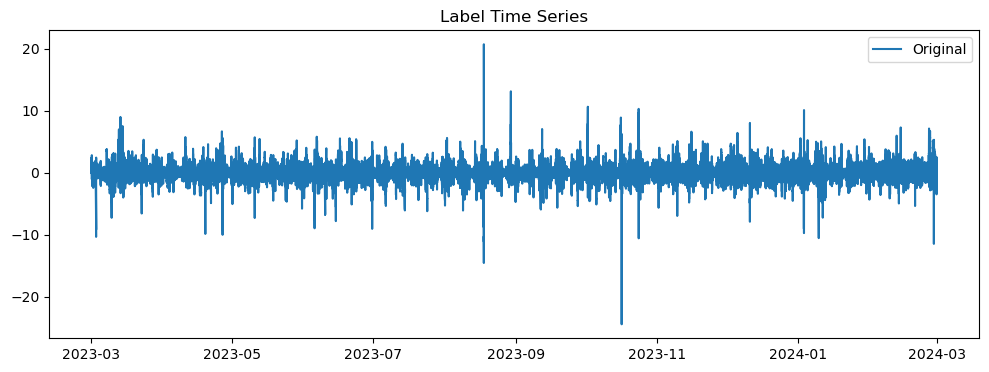

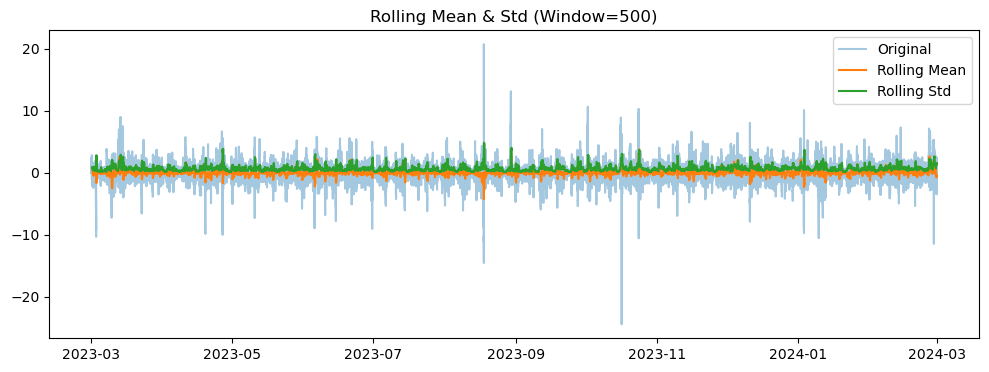

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Focus only on the target variable 'label'
series = df['label']

# Plot the original time series
plt.figure(figsize=(12,4))
plt.plot(series, label='Original')
plt.title('Label Time Series')
plt.legend()
plt.show()

# Compute rolling mean and standard deviation with a window of 500 steps
rolling_mean = series.rolling(window=500).mean()
rolling_std = series.rolling(window=500).std()

# Plot the original series along with rolling statistics
plt.figure(figsize=(12,4))
plt.plot(series, label='Original', alpha=0.4)
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.title('Rolling Mean & Std (Window=500)')
plt.legend()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

# Apply the Augmented Dickey-Fuller test directly on the 'label' column (after dropping NaNs)
result = adfuller(df['label'].dropna())

# Print the test statistic and p-value
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Print the critical values for different significance levels (1%, 5%, 10%)
for key, value in result[4].items():
    print(f"Critical Value {key}: {value}")

ADF Statistic: -47.24897543425324
p-value: 0.0
Critical Value 1%: -3.4303624372499946
Critical Value 5%: -2.8615454971187004
Critical Value 10%: -2.566772925915377


In [11]:
# تعداد مقادیر گمشده
print(df.isna().sum().sort_values(ascending=False).head())

# آیا ردیف تکراری داریم؟
print("Duplicated rows:", df.duplicated().sum())


bid_qty    0
ask_qty    0
X586       0
X587       0
X588       0
dtype: int64
Duplicated rows: 0


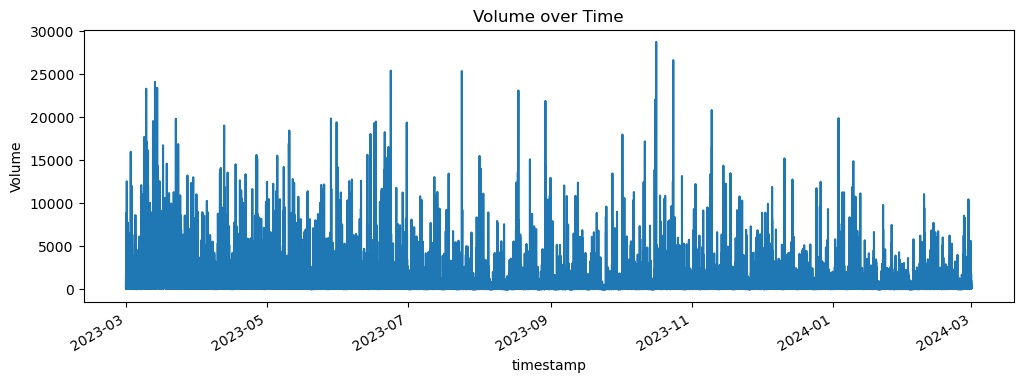

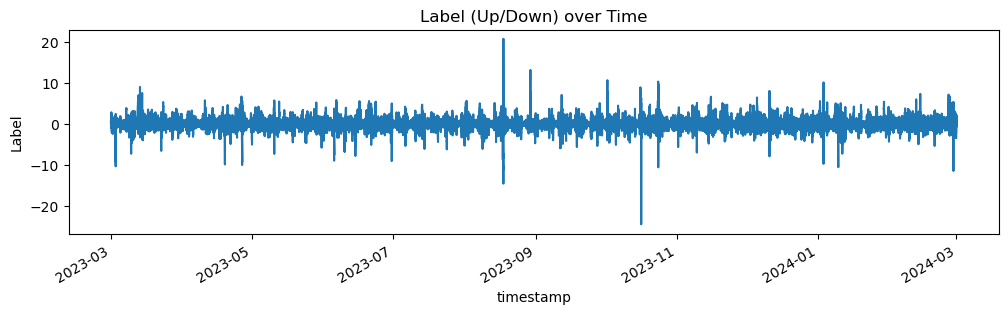

In [12]:
import matplotlib.pyplot as plt

# حجم معاملات
df['volume'].plot(figsize=(12, 4), title='Volume over Time')
plt.ylabel("Volume")
plt.show()

# برچسب بازار (label)
df['label'].plot(figsize=(12, 3), title='Label (Up/Down) over Time')
plt.ylabel("Label")
plt.show()


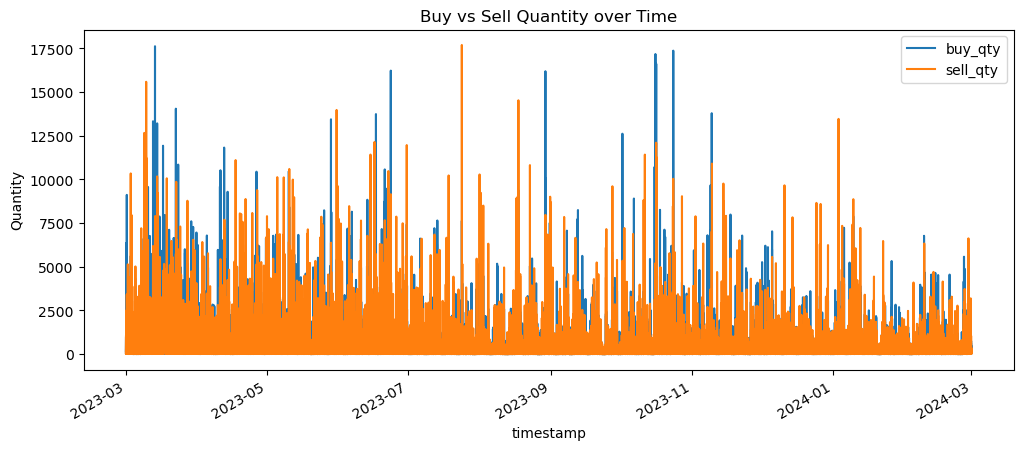

In [13]:
df[['buy_qty', 'sell_qty']].plot(figsize=(12, 5), title='Buy vs Sell Quantity over Time')
plt.ylabel("Quantity")
plt.show()


In [14]:
#جداسازی متغیرها
X = df.drop(columns=['label'])
y = df['label']


In [15]:
#تقسیم دیتا به آموزش و تست
from sklearn.model_selection import train_test_split

# به صورت زمانی تقسیم کنیم (مثلاً 80% آموزش اول، 20% تست بعدی)
split_point = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]


In [16]:
# بررسی وجود inf یا -inf
import numpy as np

print("has inf:", np.isinf(X_train).any().any())
print("has NaN:", X_train.isna().any().any())


has inf: True
has NaN: False


In [17]:
#مشخص کردن ستون‌های آلوده
inf_cols = X_train.columns[np.isinf(X_train).any()]
print("Columns with inf:", inf_cols.tolist())


Columns with inf: ['X697', 'X698', 'X699', 'X700', 'X701', 'X702', 'X703', 'X704', 'X705', 'X706', 'X707', 'X708', 'X709', 'X710', 'X711', 'X712', 'X713', 'X714', 'X715', 'X716', 'X717']


In [18]:
#چون فقط ۲۱ ستون از بین ۸۹۰ ستون مقدار inf دارن، بهترین کار اینه که فقط همونا رو تمیز کنیم
X_train.loc[:, inf_cols] = X_train[inf_cols].replace([np.inf, -np.inf], 0)
X_test.loc[:, inf_cols] = X_test[inf_cols].replace([np.inf, -np.inf], 0)



C:\Users\siman_gand23m\AppData\Local\Temp\ipykernel_2964\1589630127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, inf_cols] = X_train[inf_cols].replace([np.inf, -np.inf], 0)
C:\Users\siman_gand23m\AppData\Local\Temp\ipykernel_2964\1589630127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, inf_cols] = X_test[inf_cols].replace([np.inf, -np.inf], 0)


In [19]:
#Model Evaluation Function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    print(f"📊 {name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("-" * 40)


In [20]:
#LinearRegression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
evaluate_model("Linear Regression", y_test, y_pred_lr)



📊 Linear Regression Evaluation:
MAE: 245.61928364550786
MSE: 135023.99122811318
RMSE: 367.4561078933281
R2 Score: -125027.01782468226
----------------------------------------


In [21]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)  # می‌تونی max_depth رو تنظیم کنی
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
evaluate_model("Decision Tree", y_test, y_pred_tree)


📊 Decision Tree Evaluation:
MAE: 0.7335577797667353
MSE: 1.205543862543828
RMSE: 1.0979726146602327
R2 Score: -0.11629613495815083
----------------------------------------


In [22]:
!pip install xgboost


In [23]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100,
                         max_depth=6,
                         learning_rate=0.1,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         random_state=42,
                         n_jobs=-1)  # برای استفاده از چند هسته CPU

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model("XGBoost Regressor", y_test, y_pred_xgb)



📊 XGBoost Regressor Evaluation:
MAE: 0.8349388751090853
MSE: 1.4918751670718198
RMSE: 1.2214234184228743
R2 Score: -0.3814300205785941
----------------------------------------


In [24]:
!pip install lightgbm


In [25]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100,
                          max_depth=6,
                          learning_rate=0.1,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          random_state=42,
                          n_jobs=-1)

lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
evaluate_model("LightGBM Regressor", y_test, y_pred_lgb)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.005923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 221076
[LightGBM] [Info] Number of data points in the train set: 420709, number of used features: 867
[LightGBM] [Info] Start training from score 0.025639
📊 LightGBM Regressor Evaluation:
MAE: 0.873071885091558
MSE: 1.5851768544186344
RMSE: 1.2590380671046584
R2 Score: -0.4678244822040303
----------------------------------------


In [26]:
!pip install catboost


In [27]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,  # خاموش کردن خروجی‌های طولانی
    random_state=42
)

cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
evaluate_model("CatBoost Regressor", y_test, y_pred_cat)


📊 CatBoost Regressor Evaluation:
MAE: 0.7823990119780002
MSE: 1.294166319891016
RMSE: 1.137614310691904
R2 Score: -0.198357775086623
----------------------------------------


In [28]:
# ساخت lag features برای متغیر label
df['label_lag_1'] = df['label'].shift(1)
df['label_lag_2'] = df['label'].shift(2)
df['label_lag_3'] = df['label'].shift(3)
df['label_lag_5'] = df['label'].shift(5)

# rolling mean/std برای روند و نوسان
df['label_roll_mean_3'] = df['label'].rolling(window=3).mean()
df['label_roll_std_3'] = df['label'].rolling(window=3).std()
df['label_roll_mean_5'] = df['label'].rolling(window=5).mean()
df['label_roll_std_5'] = df['label'].rolling(window=5).std()

# اختلاف بین volume فعلی و قبلی
df['volume_diff'] = df['volume'].diff()

# تفاوت خرید و فروش
df['buy_sell_diff'] = df['buy_qty'] - df['sell_qty']

# نسبت خرید به فروش
df['buy_sell_ratio'] = df['buy_qty'] / (df['sell_qty'] + 1e-6)

# نسبت خرید و فروش به کل volume
df['buy_volume_ratio'] = df['buy_qty'] / (df['volume'] + 1e-6)
df['sell_volume_ratio'] = df['sell_qty'] / (df['volume'] + 1e-6)

# حذف ردیف‌هایی که به خاطر lag/rolling مقدار NaN دارن
df = df.dropna().reset_index(drop=True)



In [29]:
from sklearn.feature_selection import SelectKBest, f_regression
X = df.drop(columns=['label'])  # همه ستون‌ها به‌جز target
y = df['label']


In [30]:
# پیدا کردن ستون‌هایی که هنوز inf دارن
inf_cols = X.columns[np.isinf(X).any()]
print("Columns with inf:", list(inf_cols))


Columns with inf: ['X697', 'X698', 'X699', 'X700', 'X701', 'X702', 'X703', 'X704', 'X705', 'X706', 'X707', 'X708', 'X709', 'X710', 'X711', 'X712', 'X713', 'X714', 'X715', 'X716', 'X717']


In [31]:
inf_cols = ['X697', 'X698', 'X699', 'X700', 'X701', 'X702', 'X703', 'X704', 'X705', 
            'X706', 'X707', 'X708', 'X709', 'X710', 'X711', 'X712', 'X713', 'X714', 
            'X715', 'X716', 'X717']

# جایگزینی inf و -inf فقط در این ستون‌ها
X[inf_cols] = X[inf_cols].replace([np.inf, -np.inf], 0)


In [32]:
selector = SelectKBest(score_func=f_regression, k=100)
X_selected = selector.fit_transform(X, y)

# استخراج نام ستون‌های انتخاب‌شده
selected_columns = X.columns[selector.get_support()]
selected_columns


Index(['X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X89', 'X95', 'X131', 'X137', 'X169', 'X175', 'X181',
       'X186', 'X197', 'X198', 'X217', 'X218', 'X219', 'X224', 'X225', 'X226',
       'X269', 'X270', 'X271', 'X272', 'X277', 'X278', 'X279', 'X280', 'X281',
       'X282', 'X283', 'X284', 'X285', 'X286', 'X287', 'X288', 'X289', 'X290',
       'X291', 'X292', 'X293', 'X294', 'X295', 'X296', 'X297', 'X298', 'X299',
       'X300', 'X301', 'X302', 'X303', 'X361', 'X367', 'X373', 'X379', 'X385',
       'X432', 'X444', 'X445', 'X464', 'X465', 'X466', 'X472', 'X473', 'X504',
       'X524', 'X531', 'X533', 'X538', 'X540', 'X580', 'X598', 'X612', 'X731',
       'X754', 'X758', 'X852', 'X855', 'X856', 'X857', 'X858', 'X860', 'X861',
       'X862', 'X863', 'X868', 'label_lag_1', 'label_lag_2', 'label_lag_3',
       'label_lag_5', 'label_roll_mean_3', 'label_roll_mean_5'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0
)

cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
evaluate_model("CatBoost (Top Features)", y_test, y_pred_cat)


📊 CatBoost (Top Features) Evaluation:
MAE: 0.03915694342386664
MSE: 0.013295506244253933
RMSE: 0.11530614139868671
R2 Score: 0.9871351412574855
----------------------------------------


In [35]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.


In [36]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):
   # Define the hyperparameter search space for Optuna
    params = {
        'iterations': trial.suggest_int('iterations', 100, 300),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_seed': 42,
        'verbose': 0
    }

    # Split the data for internal validation during tuning
    X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
# Train the model with sampled hyperparameters
    model = CatBoostRegressor(**params)
    model.fit(X_train_split, y_train_split)
    preds = model.predict(X_valid_split)
    rmse = mean_squared_error(y_valid_split, preds, squared=False)
    return rmse  # Return RMSE as the objective to minimize


In [38]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)  


[I 2025-06-04 07:21:21,398] A new study created in memory with name: no-name-f0b66b39-a03a-41fd-ad23-cfa7bf6ec608
C:\Users\siman_gand23m\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-06-04 07:23:25,548] Trial 0 finished with value: 0.08371210828848322 and parameters: {'iterations': 237, 'depth': 5, 'learning_rate': 0.23319465437132525, 'l2_leaf_reg': 4.591503453741796, 'random_strength': 0.07893666680331468, 'bagging_temperature': 0.9898444911143517}. Best is trial 0 with value: 0.08371210828848322.
C:\Users\siman_gand23m\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-06-04 

In [39]:
print("Best RMSE:", study.best_value)
print("Best Params:", study.best_params)


Best RMSE: 0.07276492984245175
Best Params: {'iterations': 220, 'depth': 7, 'learning_rate': 0.2866615010827237, 'l2_leaf_reg': 7.805809733589402, 'random_strength': 0.7424935025268009, 'bagging_temperature': 0.02202796277305631}


In [40]:
best_cat = CatBoostRegressor(
    iterations=220,
    depth=7,
    learning_rate=0.28666,
    l2_leaf_reg=7.8058,
    random_strength=0.7424,
    bagging_temperature=0.0220,
    random_seed=42,
    verbose=0
)

best_cat.fit(X_train, y_train)
y_pred_best = best_cat.predict(X_test)

evaluate_model("CatBoost (Tuned by Optuna)", y_test, y_pred_best)


📊 CatBoost (Tuned by Optuna) Evaluation:
MAE: 0.026344050053149017
MSE: 0.005294743511431371
RMSE: 0.07276498822532283
R2 Score: 0.9948767556420164
----------------------------------------


In [43]:
# File Path
test_file_path = 'drw-crypto-market-prediction/test.parquet'

test_df= pd.read_parquet(test_file_path)
test_df.head()

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
ID,,,,,,,,,,,,,,,,,,,,,
1,0.114,12.121,10.587,10.971,21.558,-0.732818,0.512331,-0.041982,-0.598260,-0.517646,...,1.014336,1.367567,1.584126,1.584126,1.584126,1.584125,1.567979,1.426368,2.192682,0.0
2,2.426,2.962,136.241,12.304,148.545,-0.337995,-0.412176,-0.259468,-0.334809,-0.247443,...,1.748939,1.848177,0.000131,0.000323,0.001746,0.007319,0.050925,0.142206,0.739759,0.0
3,1.085,2.343,23.390,57.171,80.561,0.111249,0.458221,0.466916,0.574081,0.324722,...,1.704680,1.772028,0.000550,0.003597,0.009265,0.019948,0.072535,0.169672,0.807862,0.0
4,14.793,1.117,116.518,13.082,129.600,-0.149399,-0.640638,-0.873778,-1.026144,-0.508816,...,0.930946,1.037839,1.382037,1.382037,1.382037,1.382037,1.381752,1.363445,2.465509,0.0
5,0.033,14.178,43.800,49.836,93.636,-0.694662,0.611254,0.067671,-0.531632,-0.581450,...,1.080267,1.141878,0.000363,0.012718,0.137533,0.464112,1.050577,1.268567,2.499015,0.0


In [55]:
test_df.reset_index(inplace=True)
submission = pd.DataFrame({
    "ID": test_df["ID"],
    "label": y_kaggle_pred
})


In [48]:
test_df['label_lag_1'] = test_df['label'].shift(1)
test_df['label_lag_2'] = test_df['label'].shift(2)
test_df['label_lag_3'] = test_df['label'].shift(3)
test_df['label_lag_5'] = test_df['label'].shift(5)

test_df['label_roll_mean_3'] = test_df['label'].rolling(window=3).mean()
test_df['label_roll_std_3'] = test_df['label'].rolling(window=3).std()
test_df['label_roll_mean_5'] = test_df['label'].rolling(window=5).mean()
test_df['label_roll_std_5'] = test_df['label'].rolling(window=5).std()

test_df['volume_diff'] = test_df['volume'].diff()
test_df['buy_sell_diff'] = test_df['buy_qty'] - test_df['sell_qty']
test_df['buy_sell_ratio'] = test_df['buy_qty'] / (test_df['sell_qty'] + 1e-6)
test_df['buy_volume_ratio'] = test_df['buy_qty'] / (test_df['volume'] + 1e-6)
test_df['sell_volume_ratio'] = test_df['sell_qty'] / (test_df['volume'] + 1e-6)



In [49]:
X_test_kaggle = test_df.reindex(columns=selected_columns)

    

In [50]:
selected_columns = X.columns  # چون X بعد از SelectKBest ساخته شده


In [51]:
y_kaggle_pred = best_cat.predict(X_test_kaggle)


In [56]:
submission = pd.DataFrame({
    "ID": test_df["ID"],  # یا اگر نام ستون شناسه چیز دیگه‌ایه، بفرست بررسی کنیم
    "label": y_kaggle_pred
})

submission.to_csv("submission.csv", index=False)
